In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
## Generate data

In [3]:
X_train = np.linspace(-1,1,20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1,1,20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

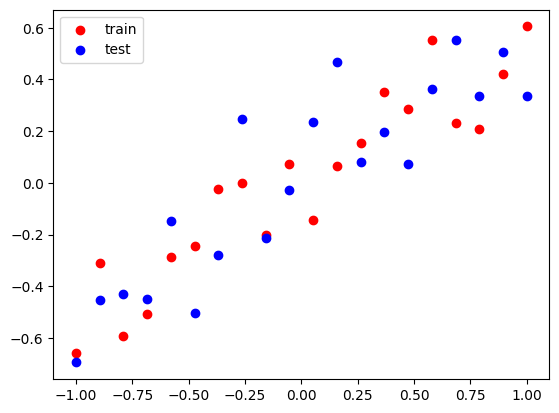

In [5]:
plt.scatter(X_train,y_train,c='r',label='train')
plt.scatter(X_test,y_test,c='b',label='test')
plt.legend()
plt.show()

In [6]:
## Regression model
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mean_squared_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train,y_train,epochs=500,verbose=1,validation_data=(X_test,y_test))


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.0398 - mean_squared_error: 0.0398 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0305 - val_mean

In [9]:
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


Train: 0.005, Test: 0.047


In [10]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


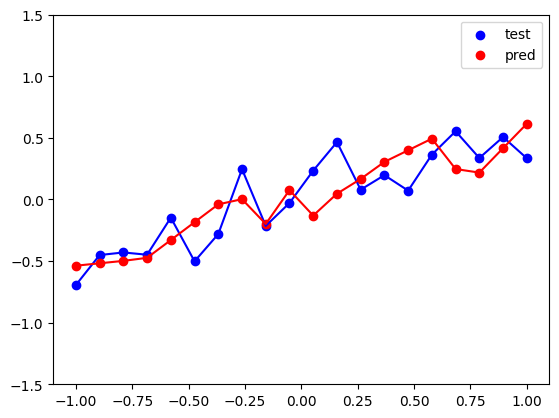

In [11]:
plt.figure()
plt.scatter(X_test,y_test,c='b',label='test')
plt.scatter(X_test,y_pred,c='r',label='pred')
plt.legend()
plt.plot(X_test,y_test,c='b',label='test')
plt.plot(X_test,y_pred,c='r',label='pred')
plt.ylim((-1.5,1.5))
plt.show()


In [12]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mean_squared_error'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
drop_out_history = model.fit(X_train,y_train,epochs=500,verbose=1,validation_data=(X_test,y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1264 - mean_squared_error: 0.1264 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0332 - val_mean_

In [14]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011056419461965561, Test: 0.03819688409566879


In [15]:
y_pred_2 = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


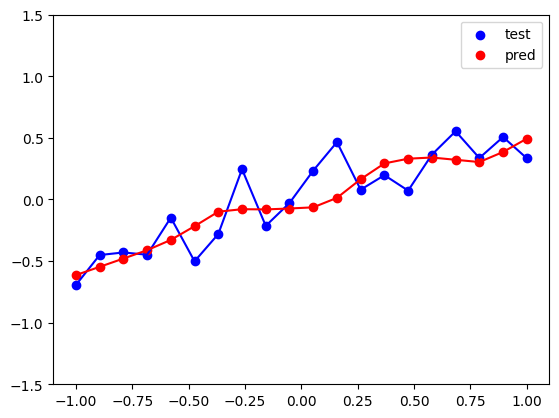

In [16]:
plt.figure()
plt.scatter(X_test,y_test,c='b',label='test')
plt.scatter(X_test,y_pred_2,c='r',label='pred')
plt.legend()
plt.plot(X_test,y_test,c='b',label='test')
plt.plot(X_test,y_pred_2,c='r',label='pred')
plt.ylim((-1.5,1.5))
plt.show()